# State of Data 2022 - Análise

## 1. Introdução

Este trabalho contempla o dasafio chamado State od Data 2022, criado dentro da plataforma Kaggle por [Data Hackers + Bain], cuja finalidade é explorar o dataset mais completo do mapeamento do mercado brasileiro de dados e fazer descobertas quanto ao grau de satisfação dos profissionais da área de dados. 

## 2. Objetivos

- Fazer descobertas sobre os motivos que tornam o profissional da área de dados satisfeito
- Explorar formas de plotar gráficos utilizando a biblioteca matplotlib da linguagem python

## 3. Metodologia

- Para este projeto, foi utilizado o dataset 'State_of_data_2022.csv' que cobre o mapeamento do mercado brasileiro de dados entre 10/10/22 e 11/28/22.
- Todos os gráficos foram construídos utilizando a linguagem de programação python e principalmente as bibliotecas pandas, numpy e matplotlib.pyplot. A plataforma ChatGPT teve papel fundamental para o aprendizado e plotagem de gráficos mais complexos.
- Visando aprendizado, o dataset foi dividido em 8 partes (datasets diferentes, mantendo a coluna de identificação para futura junção e consulta), relativos aos temas do dataset, sendo as partes 5, 6, 7 e 8 irrelevantes para este trabalho. E vários gráficos foram plotados com a finalidade de fazer uma exploração individual dos temas contidos nos dados.
- Os temas utilizados foram divididos em: Dados Demográficos, Dados de Carreira, Desafios, Conhecimento e Objetivos.
- Não foi colocado filtro adicional, pois o nível de satisfação, ainda que focado nos profissionais que já trabalham, não pode ser fator determinante para excluir aqueles que ainda não conseguiram se posicionar na mesma.

## 4. Codificação

In [1]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Configurando Pandas para exibir todas as colunas (são muitas colunas)
pd.set_option('display.max_columns', None)

#Revertendo a configuração
#pd.reset_option('display.max_columns')

In [3]:
#Carregamento do Dataset

data = pd.read_csv('data/State_of_data_2022.csv')

In [4]:
#Melhorando a leitura das colunas

data.columns = [coluna.strip("()").replace("'", "").replace(", ", "_") for coluna in data.columns]

In [5]:
#Acessando o id dos usuários pesquisados para criar novos datasets, separando todas as 5 partes da pesquisa
#Deixando-as vinculadas ao id

coluna_principal = data.iloc[:,0]

In [6]:
#Separando todas as perguntas da parte 1 em um novo dataset para análise demográfica

colunas_p1 = [coluna for coluna in data.columns if coluna.startswith('P1')]

data_parte1 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p1], axis=1)

#Separando todas as perguntas da parte 2 em um novo dataset para análise de carreira

colunas_p2 = [coluna for coluna in data.columns if coluna.startswith('P2')]

data_parte2 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p2], axis=1)

#Separando todas as perguntas da parte 3 em um novo dataset para análise de desafios

colunas_p3 = [coluna for coluna in data.columns if coluna.startswith('P3')]

data_parte3 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p3], axis=1)

#Separando todas as perguntas da parte 4 em um novo dataset para análise de conhecimento

colunas_p4 = [coluna for coluna in data.columns if coluna.startswith('P4')]

data_parte4 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p4], axis=1)

#Separando todas as perguntas da parte 5 em um novo dataset para análise de objetivos

colunas_p5 = [coluna for coluna in data.columns if coluna.startswith('P5')]

data_parte5 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p5], axis=1)

In [47]:
#DEFININDO VARIÁVEIS DE COR PARA A LEGENDA DOS GRÁFICOS

# Cor para "Satisfeito"
cor_satisfeito = '#1f77b4'
# Cor para "Insatisfeito"
cor_insatisfeito = '#ff7f0e'

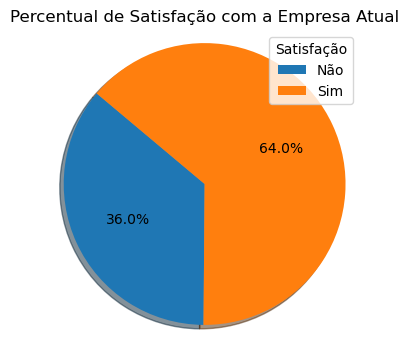

In [12]:
#Denifindo Quantidade de profissionais Satisfeitos com o que fazem em suas empresas

#Criando contagem de satisfação
contagem_sim = data_parte2['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_nao = len(data_parte2) - contagem_sim

#Criando variáveis para plotar no gráfico
labels = ['Sim', 'Não']
sizes = [contagem_nao, contagem_sim]

#Plotagem do gráfico
plt.figure(figsize=(4,4))
plt.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentual de Satisfação com a Empresa Atual')
plt.legend(title='Satisfação', labels=['Não', 'Sim'], loc='upper right')

plt.show()

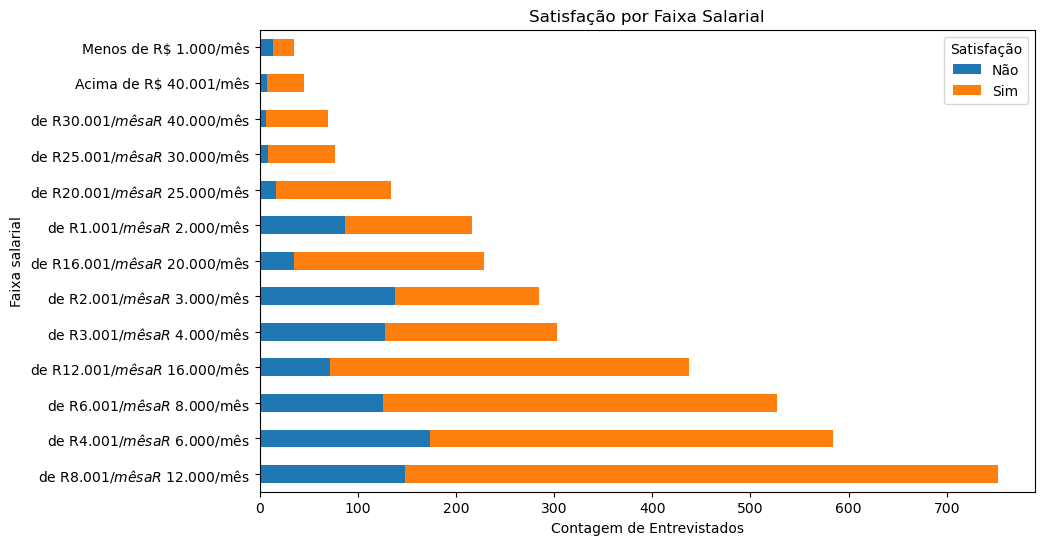

In [14]:
# Agrupando os dados por 'P2_h _Faixa salarial' e calculo de contagens para 'Sim' e 'Não'
grouped_data = data_parte2.groupby('P2_h _Faixa salarial')['P2_k _Você está satisfeito na sua empresa atual?'].value_counts().unstack(fill_value=0)

# Calcular a soma das contagens por 'Faixa salarial'
sum_counts = grouped_data.sum(axis=1)

# Ordenar o DataFrame com base na soma das contagens (em ordem decrescente)
grouped_data_sorted = grouped_data.loc[sum_counts.sort_values(ascending=False).index]

# Plotar o gráfico de barras empilhadas
grouped_data_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Contagem de Entrevistados')
plt.ylabel('Faixa salarial')
plt.title('Satisfação por Faixa Salarial')
plt.legend(title='Satisfação', labels=['Não', 'Sim'], loc='upper right')

plt.show()

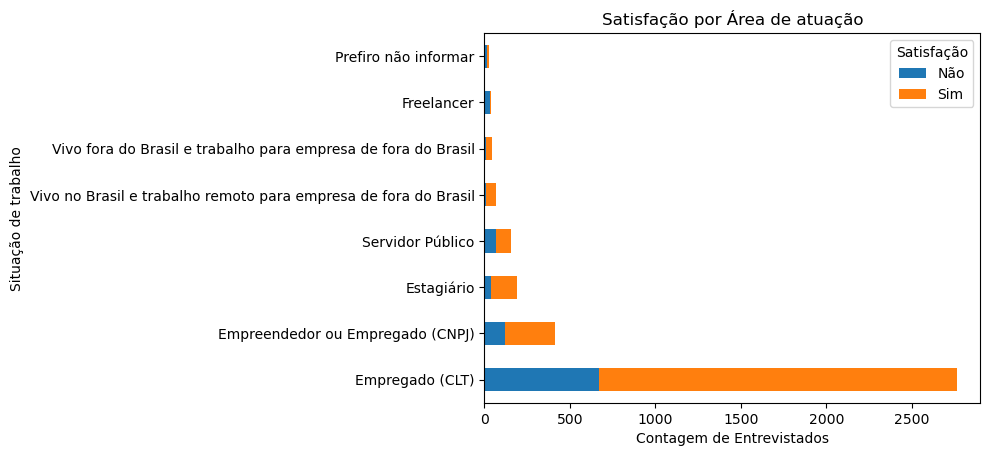

P2_k _Você está satisfeito na sua empresa atual?,False,True
P2_a _Qual sua situação atual de trabalho?,,
Empregado (CLT),672,2090
Empreendedor ou Empregado (CNPJ),119,291
Estagiário,39,149
Servidor Público,70,86
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,10,59
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,7,39
Freelancer,30,9
Prefiro não informar,13,11


In [13]:
# Agrupando os dados por 'P2_a _Qual sua situação atual de trabalho?' e calculo de contagens para 'Sim' e 'Não'
grouped_data = data_parte2.groupby('P2_a _Qual sua situação atual de trabalho?')['P2_k _Você está satisfeito na sua empresa atual?'].value_counts().unstack(fill_value=0)

# Calcular a soma das contagens por 'Qual sua situação atual de trabalho?'
sum_counts = grouped_data.sum(axis=1)

# Ordenar o DataFrame com base na soma das contagens (em ordem decrescente)
grouped_data_sorted = grouped_data.loc[sum_counts.sort_values(ascending=False).index]

# Plotar um gráfico de barras empilhadas
grouped_data_sorted.plot(kind='barh', stacked=True)
plt.xlabel('Contagem de Entrevistados')
plt.ylabel('Situação de trabalho')
plt.title('Satisfação por Área de atuação')
plt.legend(title='Satisfação', labels=['Não', 'Sim'], loc='upper right')

plt.show()

grouped_data_sorted

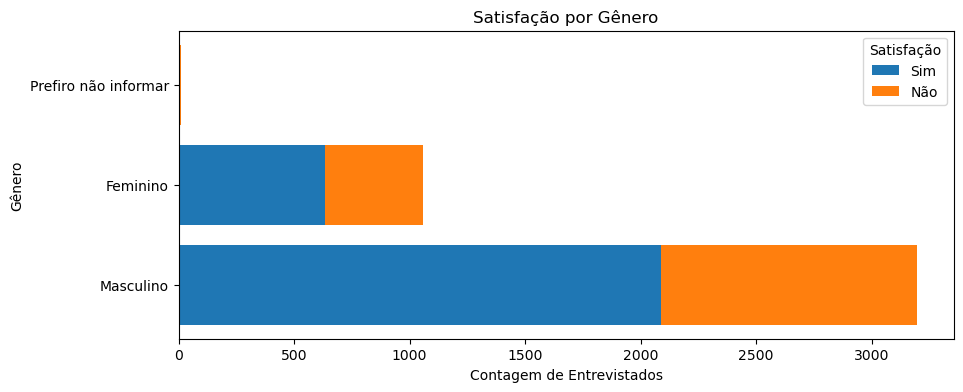

In [24]:
# Calcular as contagens de gênero usando data_parte1
contagem_genero = data_parte1['P1_b _Genero'].value_counts()

# Calcular as contagens de satisfação por gênero usando data_parte2
contagem_satisfeito_por_genero = data_parte2.groupby(data_parte1['P1_b _Genero'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_genero = contagem_genero - contagem_satisfeito_por_genero

# Plotar um gráfico de barras empilhadas para cada gênero
fig, ax = plt.subplots(figsize=(10, 4))

for genero in contagem_genero.index:
    satisfeito = contagem_satisfeito_por_genero.get(genero, 0)
    insatisfeito = contagem_insatisfeito_por_genero.get(genero, 0)
    ax.barh(genero, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {genero}')
    ax.barh(genero, insatisfeito, left=satisfeito, color=cor_insatisfeito)

# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Gênero')
ax.set_title('Satisfação por Gênero')

plt.show()

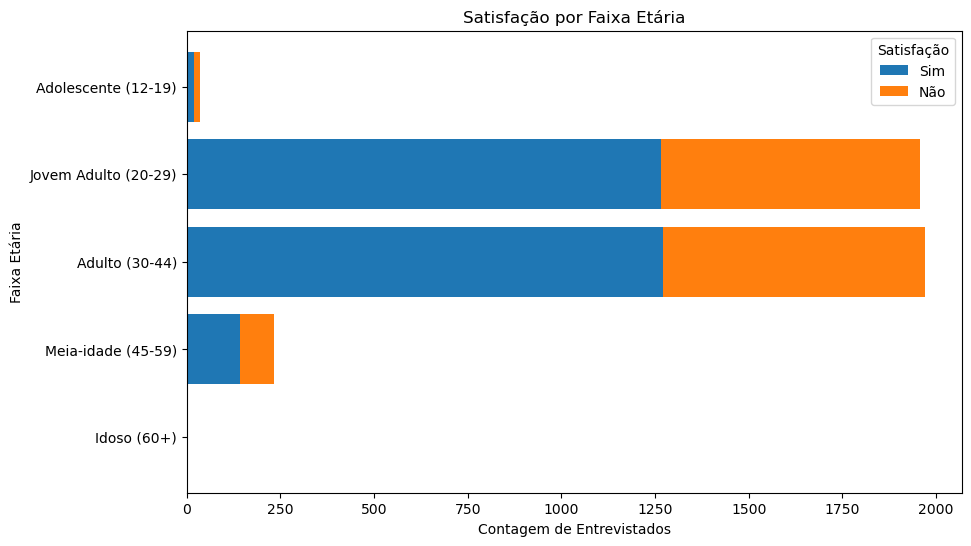

In [25]:
# Categorizado por faixa-etária categórica
faixas_etarias = ['Adolescente (12-19)', 'Jovem Adulto (20-29)', 'Adulto (30-44)', 'Meia-idade (45-59)', 'Idoso (60+)']
limites_idade = [11, 19, 29, 44, 59, 100]

data_parte1['Faixa Etária'] = pd.cut(data_parte1['P1_a _Idade'], bins=limites_idade, labels=faixas_etarias)

contagem_faixa_etaria = data_parte1['Faixa Etária'].value_counts()

contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

# Calcular as contagens de satisfação por faixa etária usando data_parte2
contagem_satisfeito_por_faixa = data_parte2.groupby(data_parte1['Faixa Etária'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_faixa = contagem_faixa_etaria - contagem_satisfeito_por_faixa

# Plotar um gráfico de barras empilhadas para cada faixa etária
fig, ax = plt.subplots(figsize=(10, 6))

for faixa in contagem_faixa_etaria.index:
    satisfeito = contagem_satisfeito_por_faixa.get(faixa, 0)
    insatisfeito = contagem_insatisfeito_por_faixa.get(faixa, 0)
    ax.barh(faixa, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {faixa}')
    ax.barh(faixa, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Faixa Etária')
ax.set_title('Satisfação por Faixa Etária')

plt.gca().invert_yaxis() # Inverte o eixo y para a faixa etária mais jovem aparecer no topo

plt.show()

In [48]:
contagem_satisfeito_por_faixa

Faixa Etária
Adolescente (12-19)       20
Jovem Adulto (20-29)    1266
Adulto (30-44)          1271
Meia-idade (45-59)       141
Idoso (60+)                0
Name: P2_k _Você está satisfeito na sua empresa atual?, dtype: object

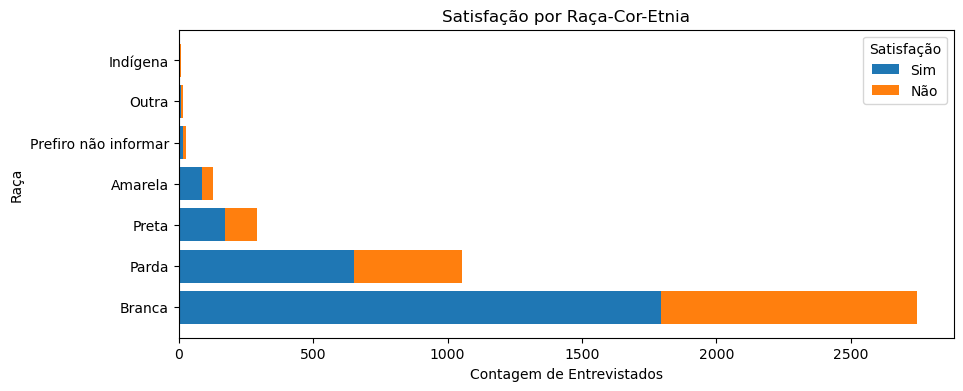

In [34]:
# Calcular as contagens de raça usando data_parte1
contagem_raca = data_parte1['P1_c _Cor/raca/etnia'].value_counts()

# Calcular as contagens de satisfação por raça usando data_parte2
contagem_satisfeito_por_raca = data_parte2.groupby(data_parte1['P1_c _Cor/raca/etnia'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_raca = contagem_raca - contagem_satisfeito_por_raca

# Plotar um gráfico de barras empilhadas para cada raça
fig, ax = plt.subplots(figsize=(10, 4))

for raca, contagem_raca in contagem_raca.items():
    satisfeito = contagem_satisfeito_por_raca.get(raca, 0)
    insatisfeito = contagem_insatisfeito_por_raca.get(raca, 0)
    ax.barh(raca, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {raca}')
    ax.barh(raca, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Raça')
ax.set_title('Satisfação por Raça-Cor-Etnia')

plt.show()

In [49]:
contagem_insatisfeito_por_faixa

Adolescente (12-19)      15
Jovem Adulto (20-29)    692
Adulto (30-44)          699
Meia-idade (45-59)       93
Idoso (60+)               0
dtype: object

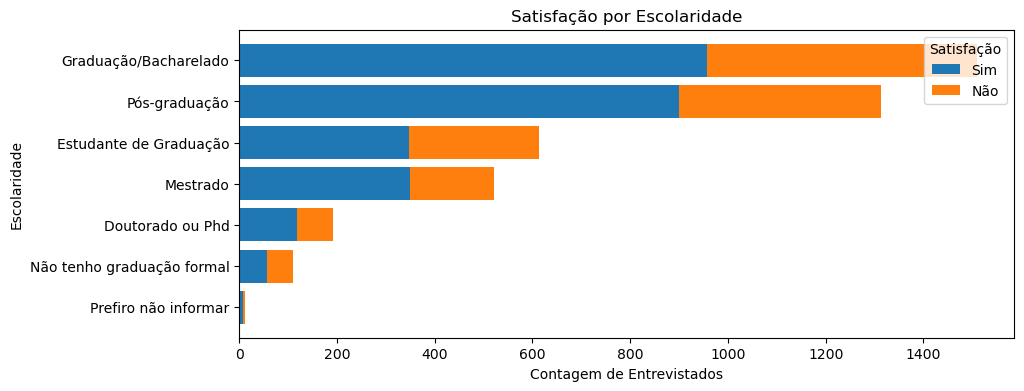

In [26]:
# Calcular as contagens de satisfação
contagem_sim = data_parte2['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_nao = len(data_parte2) - contagem_sim

# Calcular as contagens de nivel de escolaridade usando data_parte1
contagem_escolaridade = data_parte1['P1_l _Nivel de Ensino'].value_counts()

# Calcular as contagens de satisfação por raça usando data_parte2
contagem_satisfeito_por_escolaridade = data_parte2.groupby(data_parte1['P1_l _Nivel de Ensino'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_escolaridade = contagem_escolaridade - contagem_satisfeito_por_escolaridade

# Plotar um gráfico de barras empilhadas para cada escolaridade
fig, ax = plt.subplots(figsize=(10, 4))

for escolaridade, contagem_escolaridade in contagem_escolaridade.items():
    satisfeito = contagem_satisfeito_por_escolaridade.get(escolaridade, 0)
    insatisfeito = contagem_insatisfeito_por_escolaridade.get(escolaridade, 0)
    ax.barh(escolaridade, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {escolaridade}')
    ax.barh(escolaridade, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Escolaridade')
ax.set_title('Satisfação por Escolaridade')

plt.gca().invert_yaxis()

plt.show()

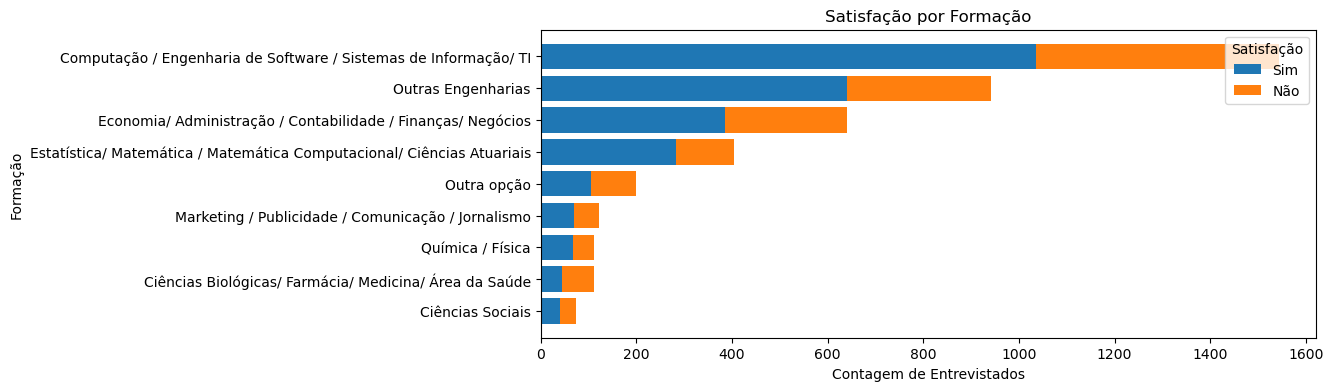

In [37]:
# Calcular as contagens de nivel de formação usando data_parte1
contagem_formacao = data_parte1['P1_m _Área de Formação'].value_counts()

# Calcular as contagens de satisfação por formação usando data_parte2
contagem_satisfeito_por_formacao = data_parte2.groupby(data_parte1['P1_m _Área de Formação'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_formacao = contagem_formacao - contagem_satisfeito_por_formacao

# Plotar um gráfico de barras empilhadas para cada formação
fig, ax = plt.subplots(figsize=(10, 4))

for formacao, contagem_formacao in contagem_formacao.items():
    satisfeito = contagem_satisfeito_por_formacao.get(formacao, 0)
    insatisfeito = contagem_insatisfeito_por_formacao.get(formacao, 0)
    ax.barh(formacao, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {formacao}')
    ax.barh(formacao, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Formação')
ax.set_title('Satisfação por Formação')

plt.gca().invert_yaxis()

plt.show()

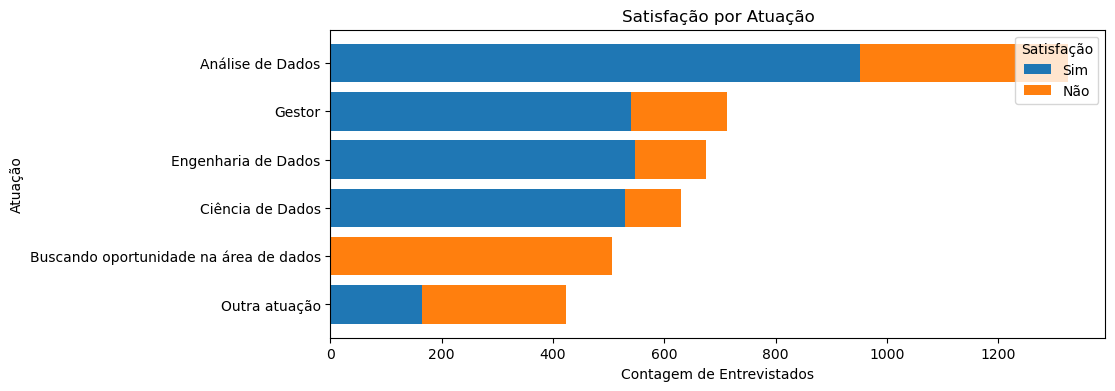

In [39]:
# Calcular as contagens de área de atuação usando data_parte4
contagem_atuacao = data_parte4['P4_a_1 _Atuacao'].value_counts()

# Calcular as contagens de satisfação por atuação usando data_parte2
contagem_satisfeito_por_atuacao = data_parte2.groupby(data_parte4['P4_a_1 _Atuacao'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_atuacao = contagem_atuacao - contagem_satisfeito_por_atuacao

# Plotar um gráfico de barras empilhadas para cada atuação
fig, ax = plt.subplots(figsize=(10, 4))

for atuacao, contagem_atuacao in contagem_atuacao.items():
    satisfeito = contagem_satisfeito_por_atuacao.get(atuacao, 0)
    insatisfeito = contagem_insatisfeito_por_atuacao.get(atuacao, 0)
    ax.barh(atuacao, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {atuacao}')
    ax.barh(atuacao, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Atuação')
ax.set_title('Satisfação por Atuação')

plt.gca().invert_yaxis()

plt.show()

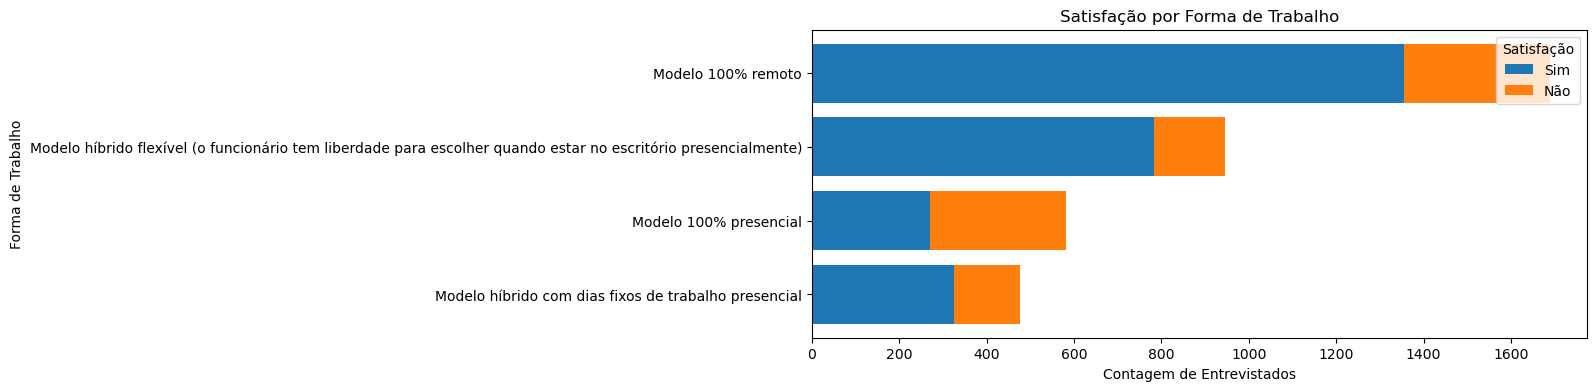

In [40]:
# Calcular as contagens de satisfação
contagem_sim = data_parte2['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_nao = len(data_parte2) - contagem_sim

# Calcular as contagens de satisfação por forma de trabalho o usando data_parte2
contagem_forma_trabalho = data_parte2['P2_p _Atualmente qual a sua forma de trabalho?'].value_counts()

# Calcular as contagens de satisfação por forma de trabalho usando data_parte2
contagem_satisfeito_por_forma_trabalho = data_parte2.groupby(data_parte2['P2_p _Atualmente qual a sua forma de trabalho?'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_forma_trabalho = contagem_forma_trabalho - contagem_satisfeito_por_forma_trabalho

# Plotar um gráfico de barras empilhadas para cada forma de trabalho
fig, ax = plt.subplots(figsize=(10, 4))

for trabalho, contagem_forma_trabalho in contagem_forma_trabalho.items():
    satisfeito = contagem_satisfeito_por_forma_trabalho.get(trabalho, 0)
    insatisfeito = contagem_insatisfeito_por_forma_trabalho.get(trabalho, 0)
    ax.barh(trabalho, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {trabalho}')
    ax.barh(trabalho, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Forma de Trabalho')
ax.set_title('Satisfação por Forma de Trabalho')

plt.gca().invert_yaxis()

plt.show()

In [38]:
contagem_atuacao = data_parte4['P4_a_1 _Atuacao'].value_counts()

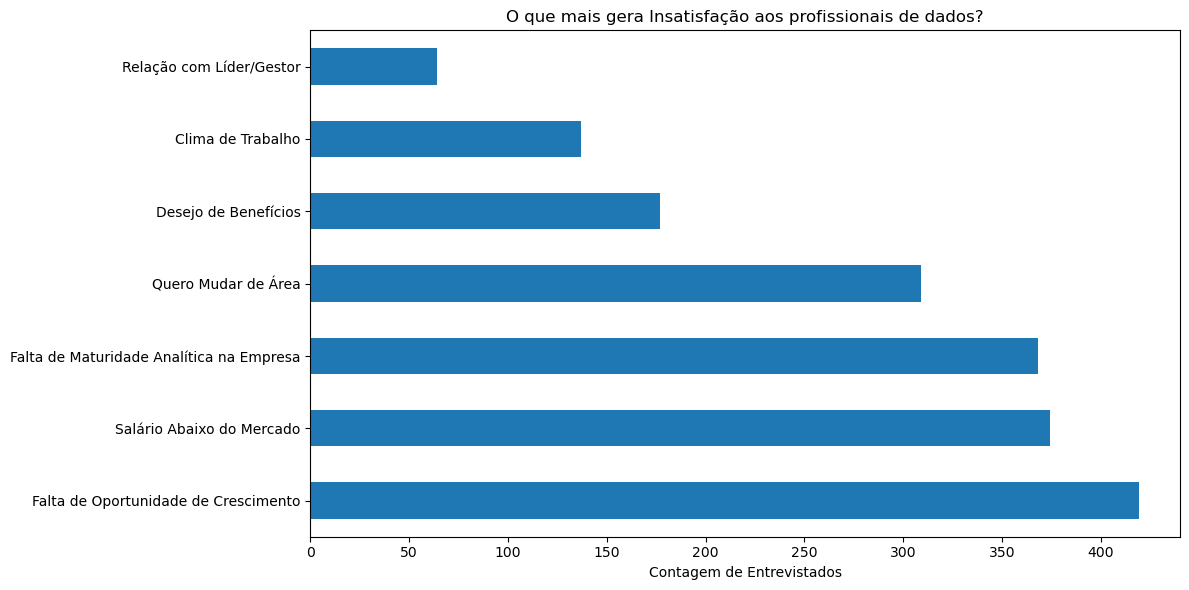

In [46]:
# Selecione as colunas que você deseja contar e renomear
colunas_contagem = {
    'P2_l_1 _Falta de oportunidade de crescimento no emprego atual': 'Falta de Oportunidade de Crescimento',
    'P2_l_2 _Salário atual não corresponde ao mercado': 'Salário Abaixo do Mercado',
    'P2_l_3 _Não tenho uma boa relação com meu líder/gestor': 'Relação com Líder/Gestor',
    'P2_l_4 _Gostaria de trabalhar em em outra área de atuação': 'Quero Mudar de Área',
    'P2_l_5 _Gostaria de receber mais benefícios': 'Desejo de Benefícios',
    'P2_l_6 _O clima de trabalho/ambiente não é bom': 'Clima de Trabalho',
    'P2_l_7 _Falta de maturidade analítica na empresa': 'Falta de Maturidade Analítica na Empresa'
}

# Crie um novo DataFrame com as contagens
contagem_df = pd.DataFrame()

for coluna, novo_nome in colunas_contagem.items():
    contagem_df[novo_nome] = data_parte2[coluna].value_counts()

# Transponha o DataFrame para que as colunas se tornem índices
contagem_df = contagem_df.T

# Ordene o DataFrame com base na contagem em ordem decrescente
contagem_df = contagem_df.sort_values(by=1, ascending=False)  # Supondo que 1 representa a contagem

# Crie um gráfico de barras horizontais empilhadas, excluindo o valor 0.0
ax = contagem_df[contagem_df.columns[contagem_df.columns != 0.0]].plot(
    kind='barh', stacked=False, figsize=(12, 6), legend=False
)

plt.title('O que mais gera Insatisfação aos profissionais de dados?')
plt.xlabel('Contagem de Entrevistados')

# Mostre o gráfico
plt.tight_layout()
plt.show()

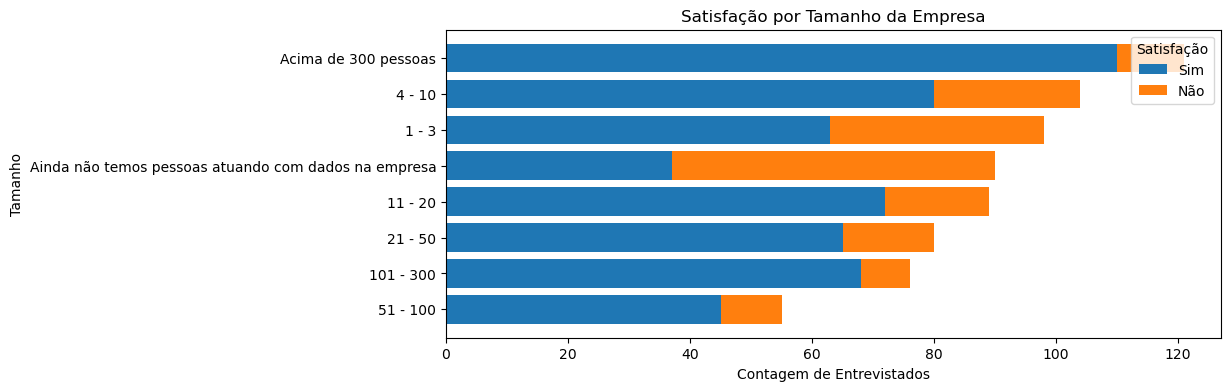

In [41]:
# Calcular as contagens de nivel de formação usando data_parte3
contagem_tamanho = data_parte3['P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'].value_counts()

# Calcular as contagens de satisfação por formação usando data_parte2
contagem_satisfeito_por_tamanho = data_parte2.groupby(data_parte3['P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_tamanho = contagem_tamanho - contagem_satisfeito_por_tamanho

# Plotar um gráfico de barras empilhadas para cada formação
fig, ax = plt.subplots(figsize=(10, 4))

for tamanho, contagem_tamanho in contagem_tamanho.items():
    satisfeito = contagem_satisfeito_por_tamanho.get(tamanho, 0)
    insatisfeito = contagem_insatisfeito_por_tamanho.get(tamanho, 0)
    ax.barh(tamanho, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {tamanho}')
    ax.barh(tamanho, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_ylabel('Tamanho')
ax.set_title('Satisfação por Tamanho da Empresa')

plt.gca().invert_yaxis()

plt.show()

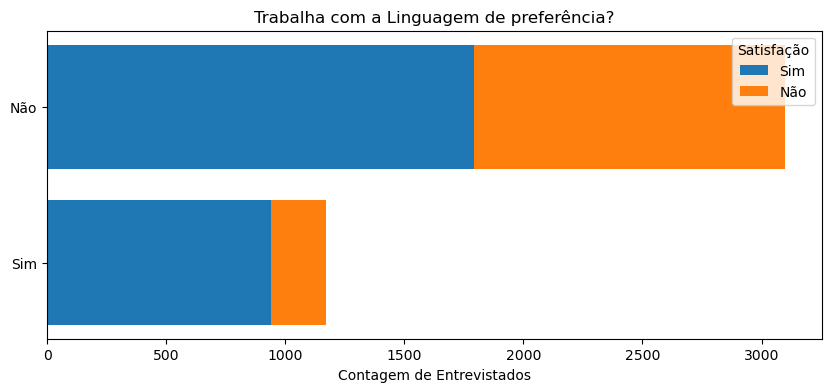

In [42]:
#COMPARAÇÃO DE PREFERÊNCIA CONTRA FERRAMENTA UTILIZADA
selecao = data_parte4.iloc[:, 36:38]
selecao = selecao.replace("NaN", np.nan)

coluna_1 = selecao['P4_e _Entre as linguagens listadas abaixo_qual é a que você mais utiliza no trabalho?']
coluna_2 = selecao['P4_f _Entre as linguagens listadas abaixo_qual é a sua preferida?']

selecao['preferencia'] = coluna_1 == coluna_2

selecao['preferencia'] = selecao['preferencia'].map({True: 'Sim', False: 'Não'})

contagem_preferencia = selecao['preferencia'].value_counts()

# Calcular as contagens de satisfação por formação usando data_parte2
contagem_satisfeito_por_preferencia = data_parte2.groupby(selecao['preferencia'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_preferencia = contagem_preferencia - contagem_satisfeito_por_preferencia

# Plotar um gráfico de barras empilhadas para cada formação
fig, ax = plt.subplots(figsize=(10, 4))

for preferencia, contagem_preferencia in contagem_preferencia.items():
    satisfeito = contagem_satisfeito_por_preferencia.get(preferencia, 0)
    insatisfeito = contagem_insatisfeito_por_preferencia.get(preferencia, 0)
    ax.barh(preferencia, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {preferencia}')
    ax.barh(preferencia, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_title('Trabalha com a Linguagem de preferência?')

plt.gca().invert_yaxis()

plt.show()

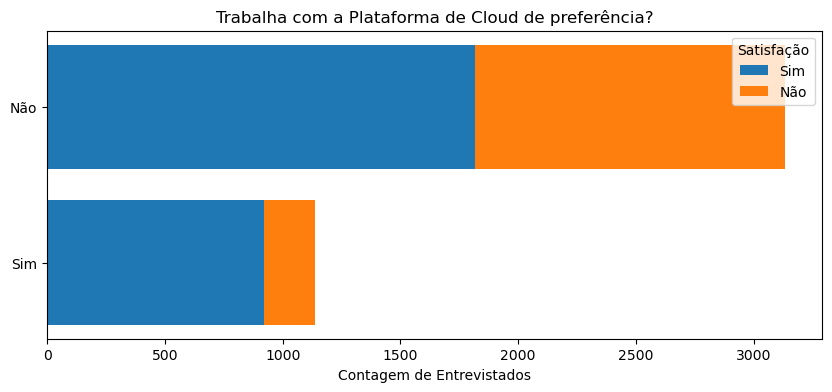

In [43]:
#COMPARAÇÃO DE PREFERÊNCIA CONTRA FERRAMENTA UTILIZADA
selecao = data_parte4.iloc[:, 72:74]
selecao = selecao.replace("NaN", np.nan)

coluna_1 = selecao['P4_g _Quais das opções de Cloud listadas abaixo você utiliza no trabalho?']
coluna_2 = selecao['P4_h _Dentre as opções listadas_qual sua Cloud preferida?']

selecao['preferencia'] = coluna_1 == coluna_2

selecao['preferencia'] = selecao['preferencia'].map({True: 'Sim', False: 'Não'})

contagem_preferencia_2 = selecao['preferencia'].value_counts()

# Calcular as contagens de satisfação por formação usando data_parte2
contagem_satisfeito_por_preferencia_2 = data_parte2.groupby(selecao['preferencia'])['P2_k _Você está satisfeito na sua empresa atual?'].sum()
contagem_insatisfeito_por_preferencia_2 = contagem_preferencia_2 - contagem_satisfeito_por_preferencia_2

# Plotar um gráfico de barras empilhadas para cada formação
fig, ax = plt.subplots(figsize=(10, 4))

for preferencia_2, contagem_preferencia_2 in contagem_preferencia_2.items():
    satisfeito = contagem_satisfeito_por_preferencia_2.get(preferencia_2, 0)
    insatisfeito = contagem_insatisfeito_por_preferencia_2.get(preferencia_2, 0)
    ax.barh(preferencia_2, satisfeito, color=cor_satisfeito, label=f'Satisfeito - {preferencia_2}')
    ax.barh(preferencia_2, insatisfeito, left=satisfeito, color=cor_insatisfeito)
    
# Criar uma única legenda para ambas as cores
legenda = [plt.Rectangle((0, 0), 1, 1, fc=cor_satisfeito, label='Sim'),
           plt.Rectangle((0, 0), 1, 1, fc=cor_insatisfeito, label='Não')]
ax.legend(handles=legenda, title='Satisfação', loc='upper right')

ax.set_xlabel('Contagem de Entrevistados')
ax.set_title('Trabalha com a Plataforma de Cloud de preferência?')

plt.gca().invert_yaxis()

plt.show()

## 5. Descobertas

- Pessoas com salários na faixa de 1000 a 4000 reais por mês, tendem a apresentar um índice de satisfação menor do que pessoas com salários mais elevados

- A situação de trabalho dos profissionais de dados mais satisfeitos são, em proporção, os que trabalham para fora do pais. Isso pode ser sustentado pelos altos salários. Em contrapartida aqueles que trabalham como freelancer ou são servidores públicos estão em maioria insatisfeitos com a situação de trabalho atual. Estagiarios, pelo tempo na área, não representam uma variável confiável o bastante para definir nível de satisfação com a área de dados.

- O gênero dos entrevistados não representa alteração do índice de satisfação com a área de dados. Mostrando que, se existir, há pouca variação no grau de satisfação com base no gênero. Apontando que a área de dados é receptiva para qualquer gênero.

- Entrevistados de 20 a 59 anos estão satisfeitos acima da média em suas empresas atuais. Porém, 1/3 dessa categoria permanece insatisfeito.

- Apesar de todas as raças e etnias se manterem acima da média, entrevistamos branco tendem a estar mais satisfeitos em suas empresas.

- Pessoas que antes pertenciam a áreas que não estejam relacionadas com exatas, tendem a ser menos satisfeitas na área de dados.

- Profissionais de trabalho que estão no regime 100% presencial são amplamente mais insatisfeitos que qualquer outro profissional que trabalhe em regime diferente.

- Dentre toda a amostra, pessoas que atuam fora da área de dados e pessoas que buscam oportunidades para ingressar na área de dados são as mais insatisfeitas, o que descaracteriza a área de atuação como fator determinando para a satisfação ou não do profissional, mas sim não estar inserido nela.

- O maior motivo de insatisfação está relacionado a Oportunidade de Crescimento, Baixo salário e Falta de maturidade analítica na empresa. 

- Quanto maior a empresa, menor o nível de insatisfação do profissional de dados

- Profissionais que não trabalham com suas ferramentas de preferência tendem a ser mais insatisfeitos que aqueles que unem o útil ao agradável em termos de trabalho com dados

## 6. Insights

- Os profissionais mais satisfeitos trabalhando com dados tendem a ter uma ótima remuneração e trabalhar no regime 100% remoto.

- Trabalhar em empresas com grande número de funcionários e que apresentem oportunidade de crescimento e também possuam maturidade analítica tornam o trabalhador de dados mais satisfeito.

- O profissional que fez a transição de carreira é menos satisfeito que aqueles que vieram de uma formação nativa de exatas. Cabe maior investigação sobre o que esperavam encontrar na área de dados. Em complemento, o nível de escolaridade não tem influência direta na satisfação daqueles que atuam com dados, mantendo os índices dentro da média em todas as categorias, de estudante a Phd. 

- Dentro da área de atuação, os mais insafisfeitos, obviamente, são aqueles que trabalham em outras funções ou ainda não trabalham na área. Porém, cabe um insight sobre os analistas de dados serem mais insafisteitos que um ciêntista de dados ou engenheiro de dados. Isso pode ser reflexo de questões já associadas aos altos indíces de satisfação, como remuneração e oportunidade de crescimento.